# Subplots - How to plot subplots of unequal sizes

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [5]:
# Generate data
N=1000 # Set number of observations you want to generate

# Get N samples from a normal distribution with mean 0, standard deviation 1:
dist_norm = np.random.normal(loc=0, scale=1, size=N)

# ...from a t distribution with 29 degrees of freedom:
dist_tdis = np.random.standard_t(df=29, size=N)

# ...from a F distribution:
dist_fdis = np.random.f(dfnum=59, dfden=28, size=N)

#...from a chi-square distribution with 2 degrees of freedom:
dist_chsq = np.random.chisquare(df=2, size=N)

## `subplot2grid` method

`plt.subplot2grid(shape, loc, rowspan=1, colspan=1, fig=None, **kwargs)`

- `shape` : sequence of 2 ints
    - Shape of grid in which to place axis. First entry is number of rows, second entry is number of columns.
- `loc` : sequence of 2 ints
    - Location to place axis within grid. First entry is row number, second entry is column number.
- `rowspan` : int
    - Number of rows for the axis to span to the right.
- `colspan` : int
    - Number of columns for the axis to span downwards.
- `fig` : Figure, optional
    - Figure to place axis in. Defaults to current figure.



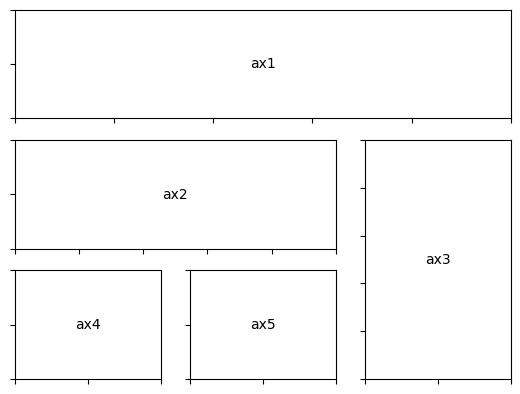

In [8]:
def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


fig = plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

annotate_axes(fig)

plt.show()

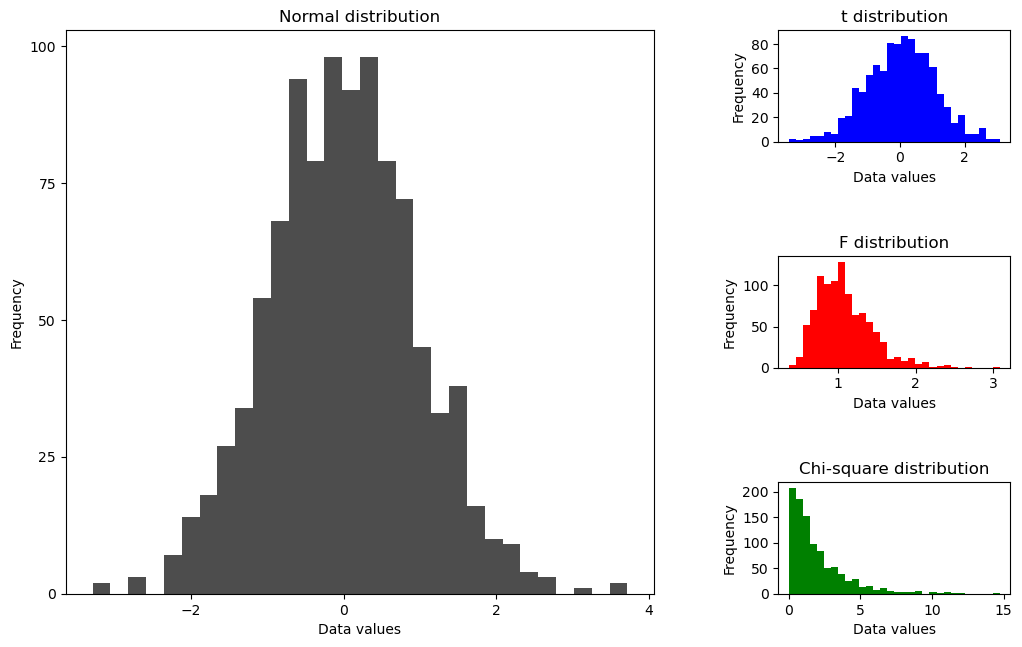

In [10]:
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(3,3)

# large subplot
plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Normal distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_norm, bins=30, color='0.30')

# small subplot 1
plt.subplot2grid((3,3), (0,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('t distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_tdis, bins=30, color='b')

# small subplot 2
plt.subplot2grid((3,3), (1,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('F distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_fdis, bins=30, color='r')

# small subplot 3
plt.subplot2grid((3,3), (2,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Chi-square distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_chsq, bins=30, color='g')

# fit subplots and save fig
fig.tight_layout()
fig.set_size_inches(w=11,h=7)
#fig_name = 'plot.png'
#fig.savefig(fig_name)

## `gridspec_kw` Method

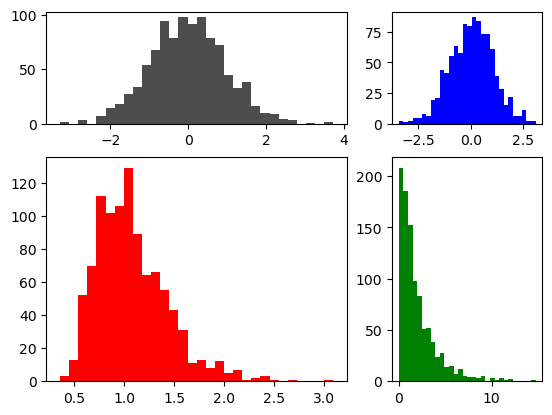

In [13]:
fig, ax = plt.subplots(2, 2, 
                       gridspec_kw={
                           'width_ratios': [2, 1],
                           'height_ratios': [1, 2]})

ax[0][0].hist(dist_norm, bins=30, color='0.30')
ax[0][1].hist(dist_tdis, bins=30, color='b')
ax[1][0].hist(dist_fdis, bins=30, color='r')
ax[1][1].hist(dist_chsq, bins=30, color='g')

plt.show()